<a href="https://colab.research.google.com/github/2303a52121/Explainable-Ai/blob/main/XAI_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


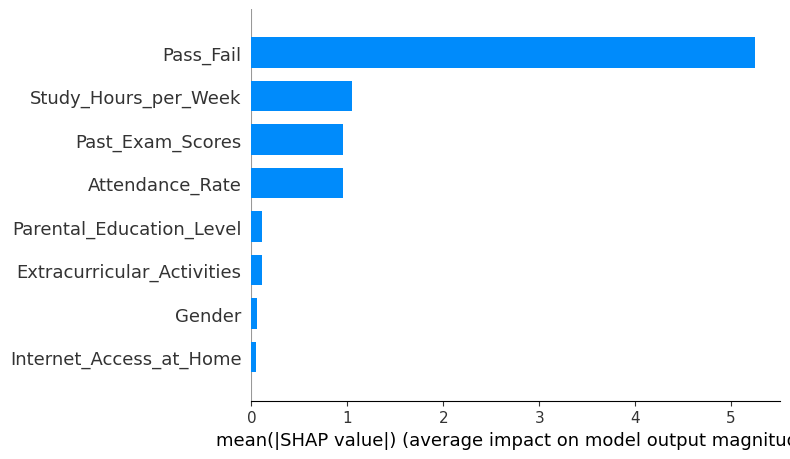

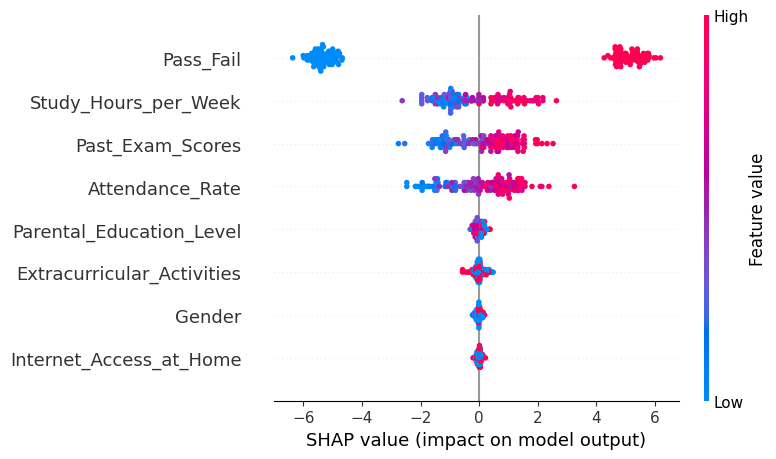

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/student_performance_dataset.csv")

# Drop Student_ID (not useful for prediction)
df = df.drop("Student_ID", axis=1)

# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features (X) and Target (y)
X = df.drop("Final_Exam_Score", axis=1)
y = df["Final_Exam_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/student_performance_dataset.csv")

# Drop Student_ID (not useful for prediction)
df = df.drop("Student_ID", axis=1)

# Preview dataset
print("Dataset Shape:", df.shape)
print(df.head())

# 2. Handle Missing Values
print("\nMissing values before cleaning:\n", df.isnull().sum())
df = df.dropna()   # Option 1: Drop missing rows
# OR: df.fillna(df.median(), inplace=True)  # Option 2: Fill with median

print("\nMissing values after cleaning:\n", df.isnull().sum())

# 3. Handle Duplicates
print("\nDuplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

# 4. Detect & Handle Outliers (using IQR method for numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nShape after outlier removal:", df.shape)

# 5. Encode Categorical Variables
categorical_cols = df.select_dtypes(include="object").columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\nEncoded Columns:", categorical_cols.tolist())


# --- Classification Task (before scaling) ---

# Features & target for classification
X_classifier = df.drop("Pass_Fail", axis=1)
y_classifier = df["Pass_Fail"]

# Train-test split (80-20) for classification
X_train_classifier, X_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X_classifier, y_classifier, test_size=0.2, random_state=42)

# Model: Random Forest Classifier
model_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
model_classifier.fit(X_train_classifier, y_train_classifier)

# Predictions
y_pred_classifier = model_classifier.predict(X_test_classifier)
y_prob_classifier = model_classifier.predict_proba(X_test_classifier)[:,1]

# Evaluation Metrics for classification
print("\n✅ Classification Metrics:")
print("Accuracy :", accuracy_score(y_test_classifier, y_pred_classifier))
print("Precision:", precision_score(y_test_classifier, y_pred_classifier))
print("Recall   :", recall_score(y_test_classifier, y_pred_classifier))
print("F1-Score :", f1_score(y_test_classifier, y_pred_classifier))
print("ROC-AUC  :", roc_auc_score(y_test_classifier, y_prob_classifier))
print("\nDetailed Report:\n", classification_report(y_test_classifier, y_pred_classifier))


# 6. Normalize / Standardize Data (for regression)
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Final Dataset Info (after scaling)
print("\nFinal Dataset Shape (after scaling):", df.shape)
print(df.head())

Dataset Shape: (708, 9)
   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0    Male                    31        68.267841                86   
1    Male                    16        78.222927                73   
2  Female                    21        87.525096                74   
3  Female                    27        92.076483                99   
4  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_Fail  
0                63      Pass  
1   

In [ ]:
# This cell is no longer needed as classification is done in the data cleaning cell (UVXFN30wBN-1)
# Keeping it for reference if needed.
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical features
# for col in df.select_dtypes(include="object").columns:
#     df[col] = LabelEncoder().fit_transform(df[col])

# # Features & target
# X_classifier = df.drop("Pass_Fail", axis=1)
# y_classifier = df["Pass_Fail"]

# # Train-test split (80-20)
# X_train_classifier, X_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X_classifier, y_classifier, test_size=0.2, random_state=42)

# # Model: Random Forest Classifier
# model_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# model_classifier.fit(X_train_classifier, y_train_classifier)

# # Predictions
# y_pred_classifier = model_classifier.predict(X_test_classifier)
# y_prob_classifier = model_classifier.predict_proba(X_test_classifier)[:,1]

# # Evaluation Metrics
# print("✅ Classification Metrics:")
# print("Accuracy :", accuracy_score(y_test_classifier, y_pred_classifier))
# print("Precision:", precision_score(y_test_classifier, y_pred_classifier))
# print("Recall   :", recall_score(y_test_classifier, y_pred_classifier))
# print("F1-Score :", f1_score(y_test_classifier, y_pred_classifier))
# print("ROC-AUC  :", roc_auc_score(y_test_classifier, y_prob_classifier))
# print("\nDetailed Report:\n", classification_report(y_test_classifier, y_pred_classifier))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("Final_Exam_Score", axis=1)
y = df["Final_Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
mpe = ((y_test - y_pred) / y_test).mean() * 100

print("✅ Regression Metrics:")
print("MSE  :", mse)
print("RMSE :", rmse)
print("MAE  :", mae)
print("MAPE :", mape)
print("MPE  :", mpe)
print("R²   :", r2)

✅ Regression Metrics:
MSE  : 0.24113901221899384
RMSE : 0.49105907202595683
MAE  : 0.37488733586251294
MAPE : 110.23293615354018
MPE  : 25.508059104364992
R²   : 0.7142755686971665


SHAP values object type: <class 'shap._explanation.Explanation'>
Shape of SHAP values: (100, 8, 2)


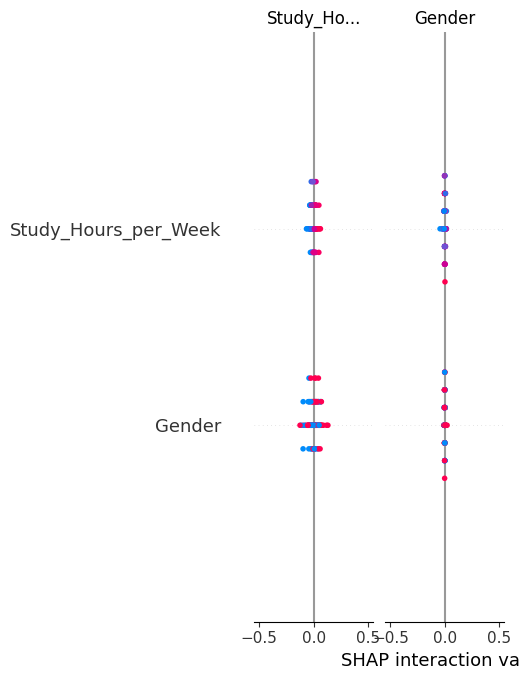

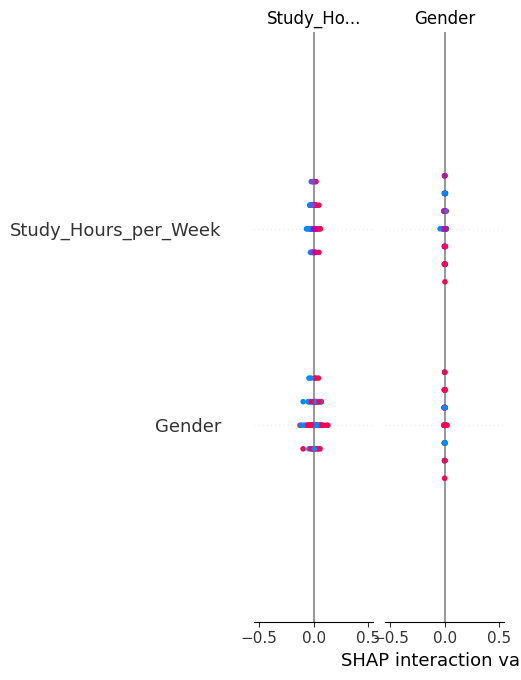

In [ ]:

import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(model_classifier, X_train_classifier)
shap_values = explainer(X_test_classifier)
print("SHAP values object type:", type(shap_values))
print("Shape of SHAP values:", shap_values.shape)
shap.summary_plot(shap_values, plot_type="bar")
shap.summary_plot(shap_values)

shap.initjs()
instance_explanation = shap_values[0, :, 1]
shap.force_plot(instance_explanation)

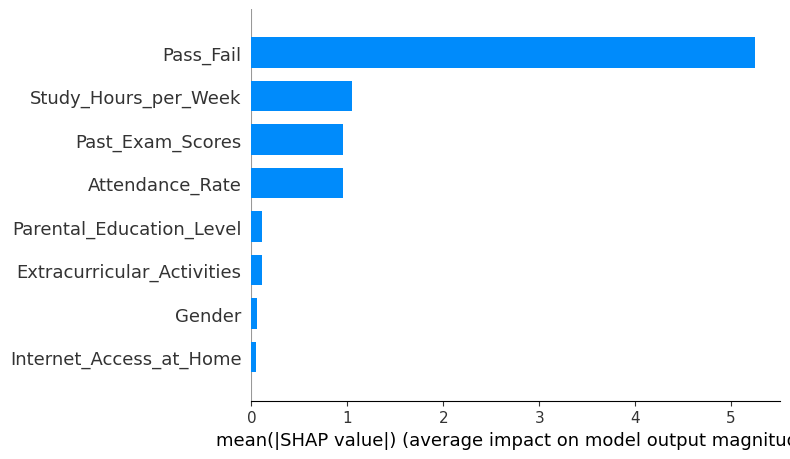

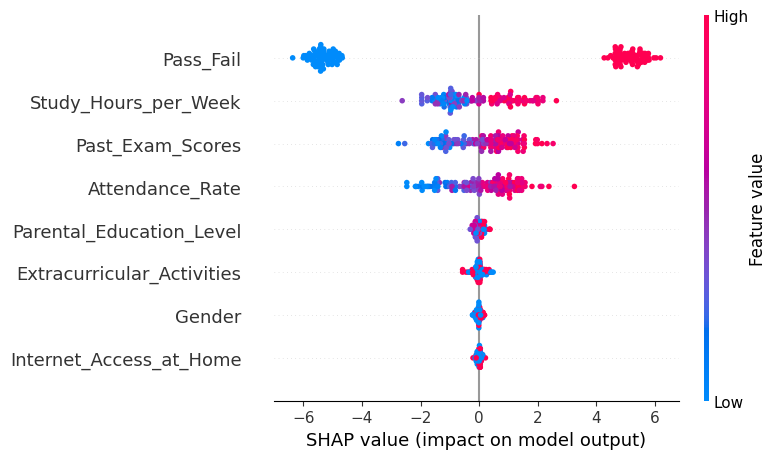

In [ ]:


import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


SHAP values object type: <class 'shap._explanation.Explanation'>
Shape of SHAP values: (100, 8, 2)


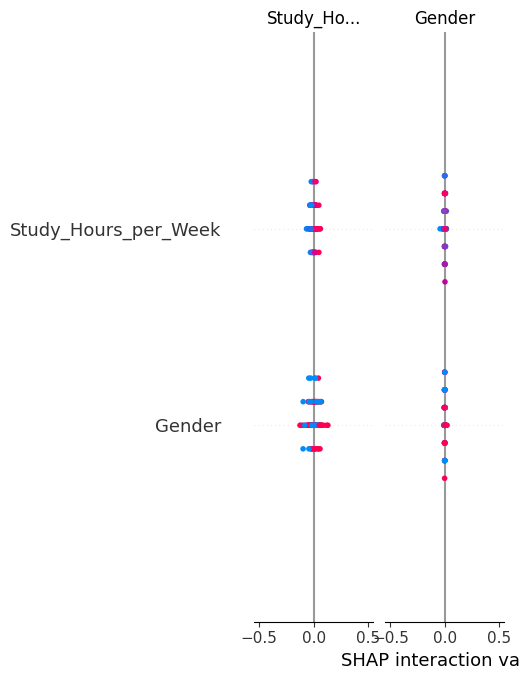

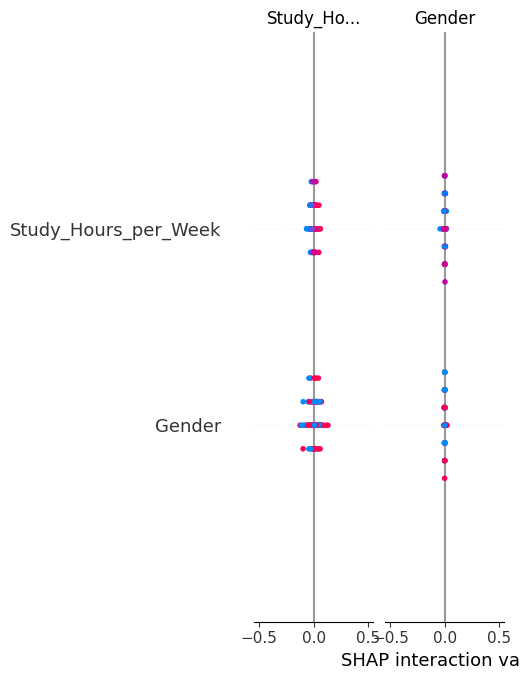

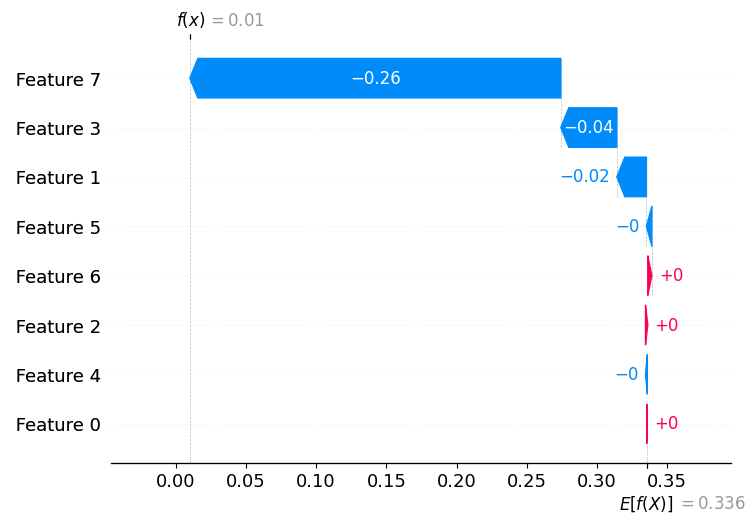

In [ ]:

import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(model_classifier, X_train_classifier)
shap_values = explainer(X_test_classifier)
print("SHAP values object type:", type(shap_values))
print("Shape of SHAP values:", shap_values.shape)

shap.summary_plot(shap_values, plot_type="bar")

shap.summary_plot(shap_values)

shap.initjs()
instance_explanation = shap_values[0, :, 1]

shap.force_plot(instance_explanation)
instance_explanation_waterfall = shap_values[0, :, 1]
shap.plots._waterfall.waterfall_legacy(instance_explanation_waterfall.base_values,
                                       instance_explanation_waterfall.values,
                                       instance_explanation_waterfall.data)

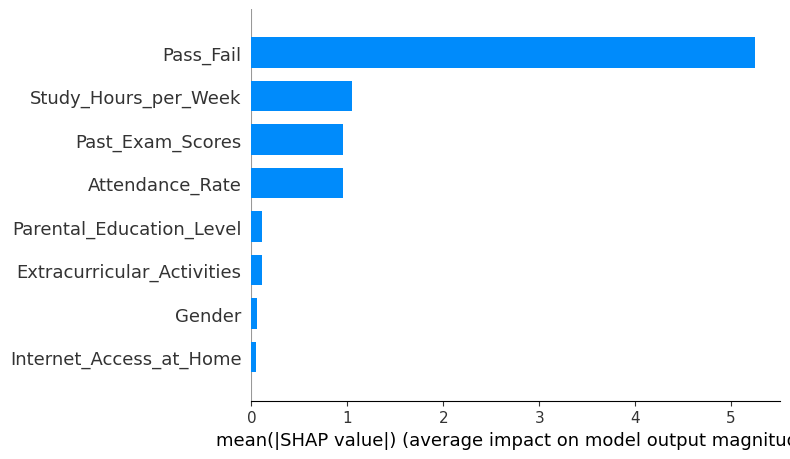

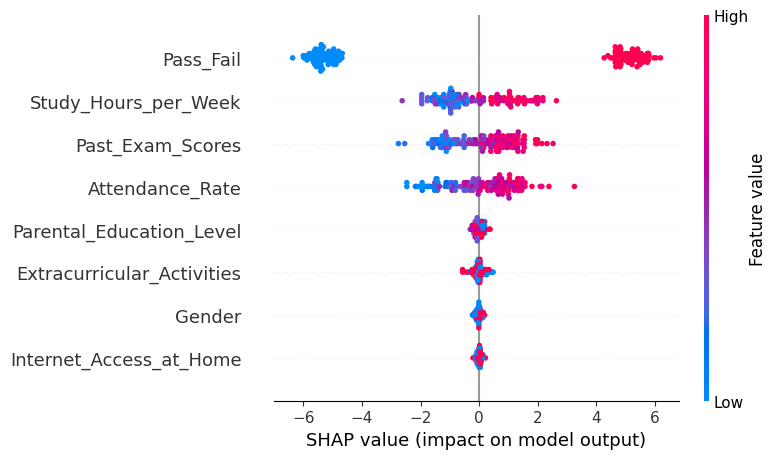

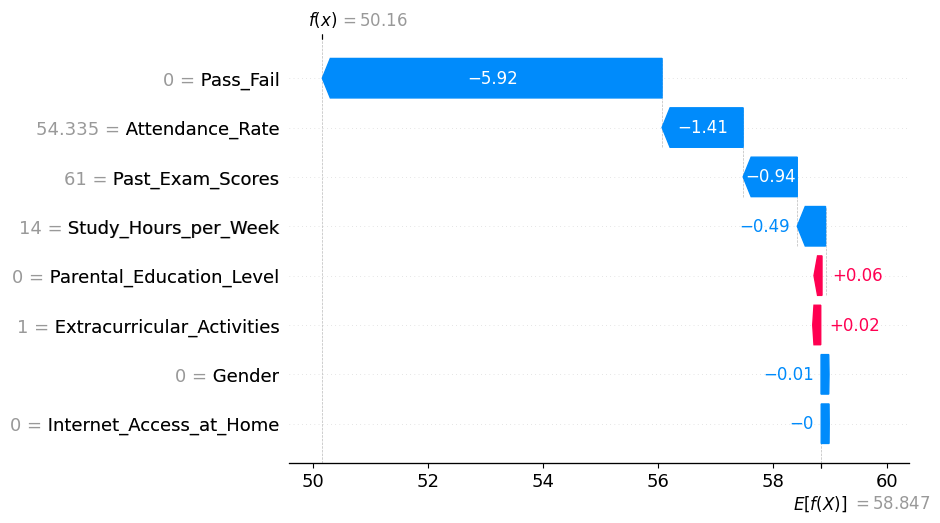

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[0,:],
                X_test.iloc[0,:])
explanation_instance = shap.Explanation(values=shap_values[0,:],
                                        base_values=explainer.expected_value,
                                        data=X_test.iloc[0,:],
                                        feature_names=X_test.columns.tolist())
shap.waterfall_plot(explanation_instance)


Top 5 Features (SHAP):
                    Feature  SHAP Importance
7                 Pass_Fail         5.246876
1      Study_Hours_per_Week         1.046150
3          Past_Exam_Scores         0.958145
2           Attendance_Rate         0.955671
4  Parental_Education_Level         0.108716

Top 5 Features (Model’s Built-in):
                    Feature  Model Importance
7                 Pass_Fail          0.740745
2           Attendance_Rate          0.087581
3          Past_Exam_Scores          0.072423
1      Study_Hours_per_Week          0.063060
4  Parental_Education_Level          0.014248

🔹 Comparison of SHAP vs Model Feature Importance:

                      Feature  SHAP Importance  Model Importance
0                   Pass_Fail         5.246876          0.740745
1        Study_Hours_per_Week         1.046150          0.063060
2            Past_Exam_Scores         0.958145          0.072423
3             Attendance_Rate         0.955671          0.087581
4    Parental_Edu

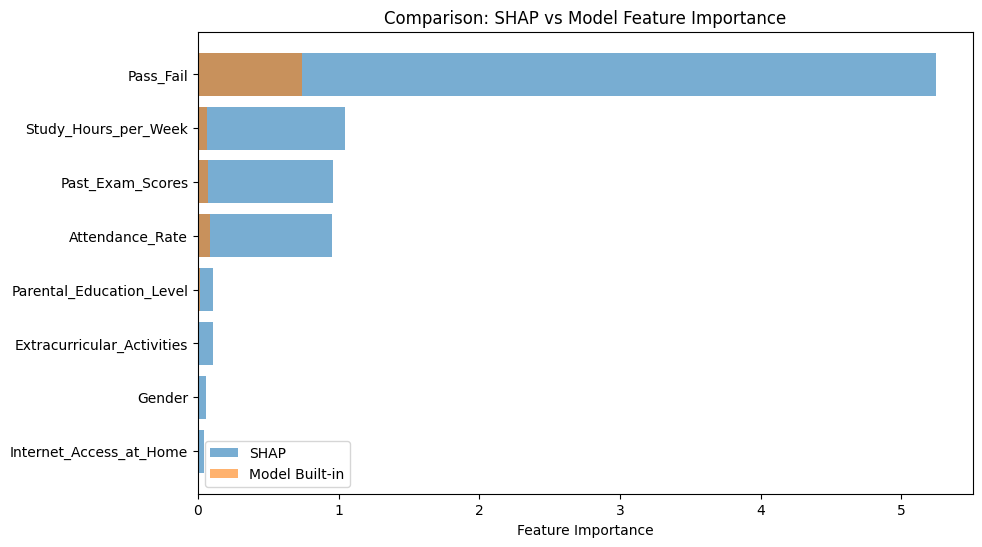

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
if isinstance(shap_values, list):
    shap_importance = np.abs(shap_values[1]).mean(axis=0)
else:
    shap_importance = np.abs(shap_values).mean(axis=0)

shap_feature_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "SHAP Importance": shap_importance
}).sort_values(by="SHAP Importance", ascending=False)

print("\nTop 5 Features (SHAP):")
print(shap_feature_importance.head(5))
model_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Model Importance": model.feature_importances_
}).sort_values(by="Model Importance", ascending=False)

print("\nTop 5 Features (Model’s Built-in):")
print(model_importance.head(5))

comparison = shap_feature_importance.merge(model_importance, on="Feature")
comparison = comparison.sort_values(by="SHAP Importance", ascending=False)

print("\n🔹 Comparison of SHAP vs Model Feature Importance:\n")
print(comparison)

plt.figure(figsize=(10,6))
plt.barh(comparison["Feature"], comparison["SHAP Importance"], alpha=0.6, label="SHAP")
plt.barh(comparison["Feature"], comparison["Model Importance"], alpha=0.6, label="Model Built-in")
plt.xlabel("Feature Importance")
plt.title("Comparison: SHAP vs Model Feature Importance")
plt.legend()
plt.gca().invert_yaxis()
plt.show()
